In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip "/content/drive/MyDrive/ColabNotebooks/dataset/weathers_classification.zip"

Archive:  /content/drive/MyDrive/ColabNotebooks/dataset/weathers_classification.zip
   creating: weathers_classification/test/
   creating: weathers_classification/test/cloudy/
  inflating: weathers_classification/test/cloudy/cloudy286.jpg  
  inflating: weathers_classification/test/cloudy/cloudy287.jpg  
  inflating: weathers_classification/test/cloudy/cloudy288.jpg  
  inflating: weathers_classification/test/cloudy/cloudy289.jpg  
  inflating: weathers_classification/test/cloudy/cloudy290.jpg  
   creating: weathers_classification/test/rain/
  inflating: weathers_classification/test/rain/rain201.jpg  
  inflating: weathers_classification/test/rain/rain202.jpg  
  inflating: weathers_classification/test/rain/rain206.jpg  
  inflating: weathers_classification/test/rain/rain207.jpg  
  inflating: weathers_classification/test/rain/rain211.jpg  
  inflating: weathers_classification/test/rain/rain212.jpg  
   creating: weathers_classification/test/shine/
  inflating: weathers_classificatio

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2  # BGR
import random
import seaborn as sns
from  matplotlib import pyplot as plt  # RGB
import matplotlib.image as mpimg
%matplotlib inline

In [10]:
data_dir = '/content/weathers_classification'

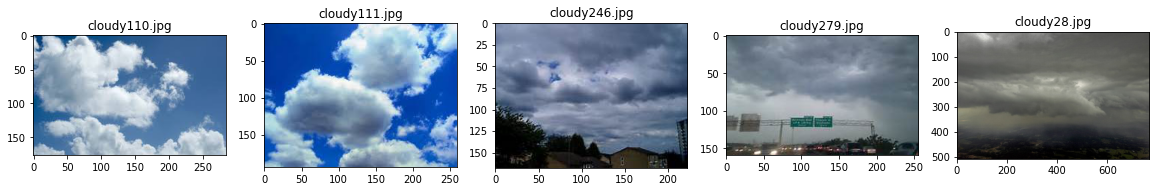

In [11]:
plt.figure(figsize=(20,20))

img_folder = os.path.join(data_dir, 'train/cloudy')
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [12]:
folder_list = os.listdir(os.path.join(data_dir, 'train'))
folder_list

['shine', 'cloudy', 'sunrise', 'rain']

In [13]:
data = []
labels = []
class_labels = {'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}
image_size = (224, 224)

In [14]:
train_dir = os.path.join(data_dir, 'train')

for class_folder in folder_list:
    image_list = os.listdir(os.path.join(train_dir , class_folder))
    
    for image_name in image_list:
        current_image_path = os.path.join(train_dir, class_folder, image_name)
        image = cv2.imread(current_image_path)
        image = cv2.resize(image, image_size)
        
        data.append(image)
        labels.append(class_labels[class_folder])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


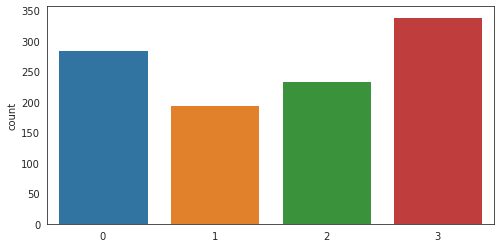

In [15]:
plt.figure(figsize=(8,4))
sns.set_style('white')
sns.countplot(labels)

In [16]:
len(data), len(labels)

(1055, 1055)

In [17]:
X_train = np.array(data)
y_train = np.array(labels)

In [18]:
type(X_train), X_train.dtype, X_train.shape

(numpy.ndarray, dtype('uint8'), (1055, 224, 224, 3))

In [19]:
type(y_train), y_train.dtype, y_train.shape

(numpy.ndarray, dtype('int64'), (1055,))

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_train.shape, y_train.dtype

((1055, 4), dtype('float32'))

In [21]:
y_train[910]

array([0., 1., 0., 0.], dtype=float32)

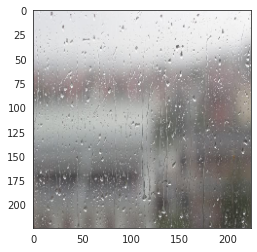

In [22]:
plt.imshow(cv2.cvtColor(X_train[910], cv2.COLOR_BGR2RGB))

In [23]:
prev_state = np.random.get_state()
np.random.shuffle(X_train)
np.random.set_state(prev_state)
np.random.shuffle(y_train)

In [24]:
y_train[150]

array([0., 0., 0., 1.], dtype=float32)

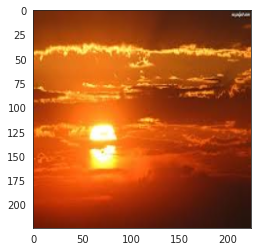

In [25]:
plt.imshow(cv2.cvtColor(X_train[150], cv2.COLOR_BGR2RGB))

In [26]:
X_train = X_train.astype('float32') / 255.0

In [27]:
print(X_train.shape, X_train.dtype, X_train.min(), X_train.max())
print(y_train.shape, y_train.dtype, y_train.min(), y_train.max())

(1055, 224, 224, 3) float32 0.0 1.0
(1055, 4) float32 0.0 1.0


In [28]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(844, 224, 224, 3) (844, 4)
(211, 224, 224, 3) (211, 4)


In [30]:
IMG_SIZE=224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

In [32]:
model = Sequential()
model.add(Conv2D(filters=32 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu", input_shape=IMG_SHAPE))
model.add(MaxPool2D())

model.add(Conv2D(filters=32 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=64 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=64 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=128 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=128 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(filters=256 ,kernel_size=3, strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [33]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Epoch 1/20
14/14 - 3s - loss: 1.3670 - accuracy: 0.3436 - val_loss: 1.3249 - val_accuracy: 0.3365 - 3s/epoch - 227ms/step
Epoch 2/20
14/14 - 2s - loss: 1.2387 - accuracy: 0.3898 - val_loss: 1.0623 - val_accuracy: 0.4787 - 2s/epoch - 146ms/step
Epoch 3/20
14/14 - 2s - loss: 0.9809 - accuracy: 0.5130 - val_loss: 0.8430 - val_accuracy: 0.5308 - 2s/epoch - 136ms/step
Epoch 4/20
14/14 - 2s - loss: 0.8126 - accuracy: 0.5972 - val_loss: 0.6805 - val_accuracy: 0.6256 - 2s/epoch - 136ms/step
Epoch 5/20
14/14 - 2s - loss: 0.7529 - accuracy: 0.6434 - val_loss: 0.5982 - val_accuracy: 0.7488 - 2s/epoch - 137ms/step
Epoch 6/20
14/14 - 2s - loss: 0.6874 - accuracy: 0.6896 - val_loss: 0.5705 - val_accuracy: 0.7346 - 2s/epoch - 137ms/step
Epoch 7/20
14/14 - 2s - loss: 0.6518 - accuracy: 0.7180 - val_loss: 0.5823 - val_accuracy: 0.7299 - 2s/epoch - 146ms/step
Epoch 8/20
14/14 - 2s - loss: 0.6374 - accuracy: 0.7168 - val_loss: 0.5265 - val_accuracy: 0.7962 - 2s/epoch - 137ms/step
Epoch 9/20
14/14 - 2s - 

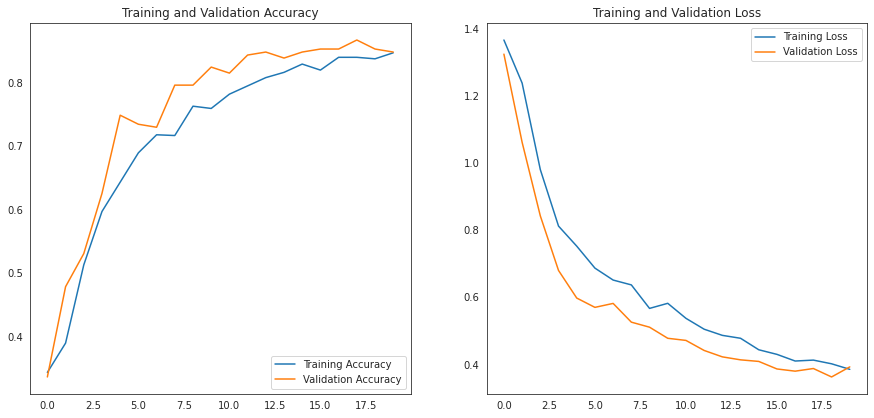

In [37]:
epochs_range = range(20)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
model.evaluate(x=x_val, y=y_val,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False
    )

7/7 [==============================] - 1s 33ms/step - loss: 0.3932 - accuracy: 0.8483


[0.3931756019592285, 0.8483412265777588]

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

prediction = model.predict(x_val)
predictions = np.argmax(prediction, axis=1)

In [40]:
y_true = []
for item in y_val:
    if item[0] == 1:
        y_true.append(0)
    elif item[1] == 1:
        y_true.append(1)
    elif item[2] == 1:
        y_true.append(2)
    else:
        y_true.append(3)

y_true = np.array(y_true)

<Figure size 720x576 with 0 Axes>

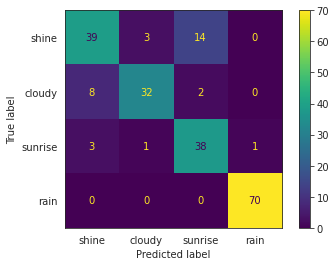

In [41]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_true, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=folder_list)
disp.plot()
plt.show()

# Pretrain Model

In [44]:
input_tensor = Input(shape=(224, 224, 3))

In [45]:
base_model = tf.keras.applications.MobileNet(
                                                input_shape=IMG_SHAPE,
                                                alpha=1.0,
                                                depth_multiplier=1,
                                                dropout=0.001,
                                                include_top=False,
                                                weights="imagenet",
                                                input_tensor=input_tensor,
                                                pooling='max',
                                                classes=1000,
                                                classifier_activation="softmax",
)

In [47]:
    for layer in base_model.layers:
        layer.trainable = False  # trainable has to be false in order to freeze the layers
        
    op = Dense(256, activation='relu')(base_model.output)
    op = Dropout(.25)(op)

    output_tensor = Dense(4, activation='softmax')(op)

    model_mobile_net2 = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

In [48]:
model_mobile_net2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [49]:
model_mobile_net2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model_mobile_net2.fit(x=X_train, y=y_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    callbacks=None,
                    validation_split=0.0,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    class_weight=None,
                    sample_weight=None,
                    initial_epoch=0,
                    steps_per_epoch=None,
                    validation_steps=None,
                    validation_batch_size=None,
                    validation_freq=1,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False,
)

Epoch 1/20
14/14 - 7s - loss: 4.4891 - accuracy: 0.4538 - val_loss: 1.4760 - val_accuracy: 0.6351 - 7s/epoch - 477ms/step
Epoch 2/20
14/14 - 2s - loss: 0.9887 - accuracy: 0.7062 - val_loss: 0.4518 - val_accuracy: 0.8294 - 2s/epoch - 169ms/step
Epoch 3/20
14/14 - 2s - loss: 0.3962 - accuracy: 0.8495 - val_loss: 0.4004 - val_accuracy: 0.8389 - 2s/epoch - 170ms/step
Epoch 4/20
14/14 - 2s - loss: 0.2618 - accuracy: 0.9005 - val_loss: 0.2892 - val_accuracy: 0.8863 - 2s/epoch - 169ms/step
Epoch 5/20
14/14 - 2s - loss: 0.1671 - accuracy: 0.9372 - val_loss: 0.2738 - val_accuracy: 0.8673 - 2s/epoch - 169ms/step
Epoch 6/20
14/14 - 2s - loss: 0.1227 - accuracy: 0.9526 - val_loss: 0.2213 - val_accuracy: 0.9242 - 2s/epoch - 170ms/step
Epoch 7/20
14/14 - 2s - loss: 0.0939 - accuracy: 0.9656 - val_loss: 0.2052 - val_accuracy: 0.9242 - 2s/epoch - 170ms/step
Epoch 8/20
14/14 - 2s - loss: 0.0776 - accuracy: 0.9704 - val_loss: 0.1780 - val_accuracy: 0.9479 - 2s/epoch - 169ms/step
Epoch 9/20
14/14 - 2s - 

In [51]:
model_mobile_net2.evaluate(
    x=x_val,
    y=y_val,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False
    )

7/7 [==============================] - 1s 77ms/step - loss: 0.1737 - accuracy: 0.9479


[0.1736593246459961, 0.9478672742843628]

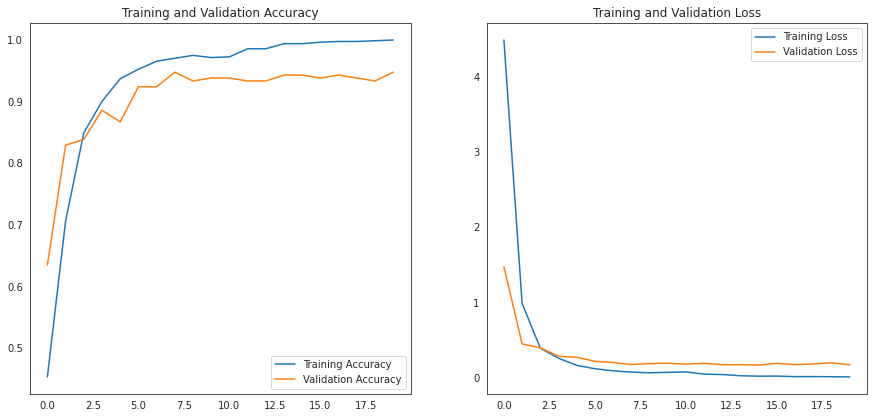

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
prediction2 = model_mobile_net2.predict(
                x_val,
                batch_size=None,
                verbose=2,
                steps=None,
                callbacks=None,
                max_queue_size=10,
                workers=1,
                use_multiprocessing=False,
)

predictions2 = np.argmax(prediction2, axis=1)


7/7 - 1s - 955ms/epoch - 136ms/step


<Figure size 720x576 with 0 Axes>

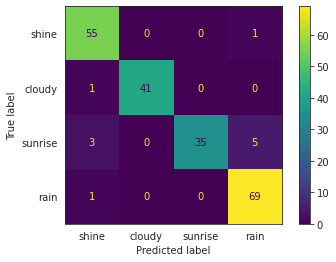

In [54]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_true, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=folder_list)
disp.plot()
plt.show()